In [336]:
!pip install pyspark

In [337]:
import pyspark

In [338]:
import pandas as pd
df=pd.read_csv('car data.csv')
df.head(20)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [339]:
from pyspark.sql import SparkSession

In [340]:
spk=SparkSession.builder.appName('Carprice').getOrCreate()

In [341]:
spk

In [342]:
df_pyspark=spk.read.csv('car data.csv')
df_pyspark.show()

+-------------+----+-------------+-------------+----------+---------+-----------+------------+-----+
|          _c0| _c1|          _c2|          _c3|       _c4|      _c5|        _c6|         _c7|  _c8|
+-------------+----+-------------+-------------+----------+---------+-----------+------------+-----+
|     Car_Name|Year|Selling_Price|Present_Price|Kms_Driven|Fuel_Type|Seller_Type|Transmission|Owner|
|         ritz|2014|         3.35|         5.59|     27000|   Petrol|     Dealer|      Manual|    0|
|          sx4|2013|         4.75|         9.54|     43000|   Diesel|     Dealer|      Manual|    0|
|         ciaz|2017|         7.25|         9.85|      6900|   Petrol|     Dealer|      Manual|    0|
|      wagon r|2011|         2.85|         4.15|      5200|   Petrol|     Dealer|      Manual|    0|
|        swift|2014|          4.6|         6.87|     42450|   Diesel|     Dealer|      Manual|    0|
|vitara brezza|2018|         9.25|         9.83|      2071|   Diesel|     Dealer|      Manu

In [343]:
df_pyspark=spk.read.option('header','true').csv('car data.csv')

In [344]:
type(df_pyspark)

pyspark.sql.dataframe.DataFrame

In [345]:
df_pyspark.head(5)

[Row(Car_Name='ritz', Year='2014', Selling_Price='3.35', Present_Price='5.59', Kms_Driven='27000', Fuel_Type='Petrol', Seller_Type='Dealer', Transmission='Manual', Owner='0'),
 Row(Car_Name='sx4', Year='2013', Selling_Price='4.75', Present_Price='9.54', Kms_Driven='43000', Fuel_Type='Diesel', Seller_Type='Dealer', Transmission='Manual', Owner='0'),
 Row(Car_Name='ciaz', Year='2017', Selling_Price='7.25', Present_Price='9.85', Kms_Driven='6900', Fuel_Type='Petrol', Seller_Type='Dealer', Transmission='Manual', Owner='0'),
 Row(Car_Name='wagon r', Year='2011', Selling_Price='2.85', Present_Price='4.15', Kms_Driven='5200', Fuel_Type='Petrol', Seller_Type='Dealer', Transmission='Manual', Owner='0'),
 Row(Car_Name='swift', Year='2014', Selling_Price='4.6', Present_Price='6.87', Kms_Driven='42450', Fuel_Type='Diesel', Seller_Type='Dealer', Transmission='Manual', Owner='0')]

In [346]:
## read the dataset
spk.read.option('header','true').csv('car data.csv',inferSchema=True)

DataFrame[Car_Name: string, Year: int, Selling_Price: double, Present_Price: double, Kms_Driven: int, Fuel_Type: string, Seller_Type: string, Transmission: string, Owner: int]

In [347]:
df_pyspark=spk.read.csv('car data.csv',header=True,inferSchema=True)

In [348]:
### check the Schema
df_pyspark.printSchema()

root
 |-- Car_Name: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Selling_Price: double (nullable = true)
 |-- Present_Price: double (nullable = true)
 |-- Kms_Driven: integer (nullable = true)
 |-- Fuel_Type: string (nullable = true)
 |-- Seller_Type: string (nullable = true)
 |-- Transmission: string (nullable = true)
 |-- Owner: integer (nullable = true)



In [349]:
df_pyspark.columns

['Car_Name',
 'Year',
 'Selling_Price',
 'Present_Price',
 'Kms_Driven',
 'Fuel_Type',
 'Seller_Type',
 'Transmission',
 'Owner']

In [350]:
df_pyspark.head(5)

[Row(Car_Name='ritz', Year=2014, Selling_Price=3.35, Present_Price=5.59, Kms_Driven=27000, Fuel_Type='Petrol', Seller_Type='Dealer', Transmission='Manual', Owner=0),
 Row(Car_Name='sx4', Year=2013, Selling_Price=4.75, Present_Price=9.54, Kms_Driven=43000, Fuel_Type='Diesel', Seller_Type='Dealer', Transmission='Manual', Owner=0),
 Row(Car_Name='ciaz', Year=2017, Selling_Price=7.25, Present_Price=9.85, Kms_Driven=6900, Fuel_Type='Petrol', Seller_Type='Dealer', Transmission='Manual', Owner=0),
 Row(Car_Name='wagon r', Year=2011, Selling_Price=2.85, Present_Price=4.15, Kms_Driven=5200, Fuel_Type='Petrol', Seller_Type='Dealer', Transmission='Manual', Owner=0),
 Row(Car_Name='swift', Year=2014, Selling_Price=4.6, Present_Price=6.87, Kms_Driven=42450, Fuel_Type='Diesel', Seller_Type='Dealer', Transmission='Manual', Owner=0)]

## To pickup a perticular Column

In [351]:
## To pickup a perticular Column
df_pyspark.select(['Fuel_Type','Car_Name']).show()

+---------+-------------+
|Fuel_Type|     Car_Name|
+---------+-------------+
|   Petrol|         ritz|
|   Diesel|          sx4|
|   Petrol|         ciaz|
|   Petrol|      wagon r|
|   Diesel|        swift|
|   Diesel|vitara brezza|
|   Petrol|         ciaz|
|   Diesel|      s cross|
|   Diesel|         ciaz|
|   Diesel|         ciaz|
|   Petrol|     alto 800|
|   Diesel|         ciaz|
|   Petrol|         ciaz|
|   Petrol|       ertiga|
|   Petrol|        dzire|
|   Diesel|       ertiga|
|   Diesel|       ertiga|
|   Diesel|       ertiga|
|      CNG|      wagon r|
|   Petrol|          sx4|
+---------+-------------+
only showing top 20 rows



## Making a new column with any equation

In [352]:
df_pyspark=df_pyspark.withColumn('Registration_Years',-(df_pyspark['Year']-2022))

In [353]:
df_pyspark.show(10)

+-------------+----+-------------+-------------+----------+---------+-----------+------------+-----+------------------+
|     Car_Name|Year|Selling_Price|Present_Price|Kms_Driven|Fuel_Type|Seller_Type|Transmission|Owner|Registration_Years|
+-------------+----+-------------+-------------+----------+---------+-----------+------------+-----+------------------+
|         ritz|2014|         3.35|         5.59|     27000|   Petrol|     Dealer|      Manual|    0|                 8|
|          sx4|2013|         4.75|         9.54|     43000|   Diesel|     Dealer|      Manual|    0|                 9|
|         ciaz|2017|         7.25|         9.85|      6900|   Petrol|     Dealer|      Manual|    0|                 5|
|      wagon r|2011|         2.85|         4.15|      5200|   Petrol|     Dealer|      Manual|    0|                11|
|        swift|2014|          4.6|         6.87|     42450|   Diesel|     Dealer|      Manual|    0|                 8|
|vitara brezza|2018|         9.25|      

# Renaming the Column

In [354]:
# Renaming the Column
df_pyspark=df_pyspark.withColumnRenamed('Fuel_Type','Engine_Type')

In [355]:
df_pyspark.show(5)

+--------+----+-------------+-------------+----------+-----------+-----------+------------+-----+------------------+
|Car_Name|Year|Selling_Price|Present_Price|Kms_Driven|Engine_Type|Seller_Type|Transmission|Owner|Registration_Years|
+--------+----+-------------+-------------+----------+-----------+-----------+------------+-----+------------------+
|    ritz|2014|         3.35|         5.59|     27000|     Petrol|     Dealer|      Manual|    0|                 8|
|     sx4|2013|         4.75|         9.54|     43000|     Diesel|     Dealer|      Manual|    0|                 9|
|    ciaz|2017|         7.25|         9.85|      6900|     Petrol|     Dealer|      Manual|    0|                 5|
| wagon r|2011|         2.85|         4.15|      5200|     Petrol|     Dealer|      Manual|    0|                11|
|   swift|2014|          4.6|         6.87|     42450|     Diesel|     Dealer|      Manual|    0|                 8|
+--------+----+-------------+-------------+----------+----------

## Dropping the Null Values

In [356]:

#df_pyspark = df_pyspark.na.drop(how="any")

## Dropping the Null Value in a perticular Column

In [357]:
# Subset
df_pyspark.na.drop(how="any",subset=['Year']).show()

+-------------+----+-------------+-------------+----------+-----------+-----------+------------+-----+------------------+
|     Car_Name|Year|Selling_Price|Present_Price|Kms_Driven|Engine_Type|Seller_Type|Transmission|Owner|Registration_Years|
+-------------+----+-------------+-------------+----------+-----------+-----------+------------+-----+------------------+
|         ritz|2014|         3.35|         5.59|     27000|     Petrol|     Dealer|      Manual|    0|                 8|
|          sx4|2013|         4.75|         9.54|     43000|     Diesel|     Dealer|      Manual|    0|                 9|
|         ciaz|2017|         7.25|         9.85|      6900|     Petrol|     Dealer|      Manual|    0|                 5|
|      wagon r|2011|         2.85|         4.15|      5200|     Petrol|     Dealer|      Manual|    0|                11|
|        swift|2014|          4.6|         6.87|     42450|     Diesel|     Dealer|      Manual|    0|                 8|
|vitara brezza|2018|    

## Filling the Null Values with a String

In [358]:
df_pyspark.na.fill('Missing Value').show()

+-------------+----+-------------+-------------+----------+-----------+-----------+------------+-----+------------------+
|     Car_Name|Year|Selling_Price|Present_Price|Kms_Driven|Engine_Type|Seller_Type|Transmission|Owner|Registration_Years|
+-------------+----+-------------+-------------+----------+-----------+-----------+------------+-----+------------------+
|         ritz|2014|         3.35|         5.59|     27000|     Petrol|     Dealer|      Manual|    0|                 8|
|          sx4|2013|         4.75|         9.54|     43000|     Diesel|     Dealer|      Manual|    0|                 9|
|         ciaz|2017|         7.25|         9.85|      6900|     Petrol|     Dealer|      Manual|    0|                 5|
|      wagon r|2011|         2.85|         4.15|      5200|     Petrol|     Dealer|      Manual|    0|                11|
|        swift|2014|          4.6|         6.87|     42450|     Diesel|     Dealer|      Manual|    0|                 8|
|vitara brezza|2018|    

In [359]:
from pyspark.ml.feature import Imputer

In [360]:
#imputer=Imputer(inputCols=['Selling_Price','Present_Price','Kms_Driven'],
 #outputCols=["{}_imputed".format(c) for c in ['Selling_Price','Present_Price','Kms_Driven']]).setStrategy("mean")

In [361]:
#imputer.fit(df_pyspark).transform(df_pyspark).show()

In [362]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [363]:
#df_pyspark = np.random.rand(10, 12)
#ax = sns.heatmap(df_pyspark)

### Filter Operations

### Filter Car Kilometer Driven is between 15000 to 20000 INR. 

In [364]:
#df_pyspark.filter("Kms_Driven>=20000")
# If we want to show the results only in selected columns
df_pyspark.filter("Kms_Driven<=20000 and Kms_Driven>=15000").select(['Car_Name','Selling_Price','Registration_Years','Kms_Driven']).show()

+--------------------+-------------+------------------+----------+
|            Car_Name|Selling_Price|Registration_Years|Kms_Driven|
+--------------------+-------------+------------------+----------+
|                ciaz|         6.75|                 7|     18796|
|                ciaz|          7.5|                 7|     15000|
|               swift|          3.0|                11|     20000|
|               swift|          6.0|                 5|     16200|
|                ciaz|          7.5|                 8|     15000|
|              innova|         18.0|                 5|     15000|
|              innova|         23.0|                 5|     15000|
|      Hyosung GT250R|         1.35|                 8|     16500|
|Royal Enfield Thu...|         1.25|                 9|     15000|
|Royal Enfield Thu...|          1.2|                 6|     18000|
|Royal Enfield Cla...|         1.15|                 7|     17000|
|Royal Enfield Cla...|         1.11|                 7|     17

### Search for if  Any null Value is present

In [365]:
df_pyspark.filter("Engine_Type is NULL AND Car_Name is NULL AND Year is NULL AND Selling_Price is NULL  AND Present_Price is NULL AND Kms_Driven is NULL AND Engine_Type is NULL AND Seller_Type is NULL AND Transmission is NULL  AND Owner is NULL AND Registration_Years is NULL").show(10)
 #   

+--------+----+-------------+-------------+----------+-----------+-----------+------------+-----+------------------+
|Car_Name|Year|Selling_Price|Present_Price|Kms_Driven|Engine_Type|Seller_Type|Transmission|Owner|Registration_Years|
+--------+----+-------------+-------------+----------+-----------+-----------+------------+-----+------------------+
+--------+----+-------------+-------------+----------+-----------+-----------+------------+-----+------------------+



## ~ Not sign is used for getting opposite Values (Inverse Filter Operation)

In [366]:
df_pyspark.filter(~(df_pyspark['Kms_Driven']==10000)).select(['Car_Name','Year']).show()

+-------------+----+
|     Car_Name|Year|
+-------------+----+
|         ritz|2014|
|          sx4|2013|
|         ciaz|2017|
|      wagon r|2011|
|        swift|2014|
|vitara brezza|2018|
|         ciaz|2015|
|      s cross|2015|
|         ciaz|2016|
|         ciaz|2015|
|     alto 800|2017|
|         ciaz|2015|
|         ciaz|2015|
|       ertiga|2015|
|        dzire|2009|
|       ertiga|2016|
|       ertiga|2015|
|       ertiga|2016|
|      wagon r|2015|
|          sx4|2010|
+-------------+----+
only showing top 20 rows



# 'groupBy' and 'Aggrigate Functions' .agg

In [367]:
# Group by
df_pyspark.groupBy('Registration_Years').sum().show()

+------------------+---------+------------------+------------------+---------------+----------+-----------------------+
|Registration_Years|sum(Year)|sum(Selling_Price)|sum(Present_Price)|sum(Kms_Driven)|sum(Owner)|sum(Registration_Years)|
+------------------+---------+------------------+------------------+---------------+----------+-----------------------+
|                12|    30150|             78.94|214.95999999999998|         900211|         1|                    180|
|                13|    12054|              16.9|             63.61|         406923|         0|                     78|
|                 6|   100800|            260.66|327.53999999999996|         919367|         1|                    300|
|                16|     8024|              5.75|36.230000000000004|         349689|         3|                     64|
|                 5|    70595|217.31999999999996|245.29999999999995|         364693|         0|                    175|
|                19|     4006|          

In [368]:
df_pyspark.show()

+-------------+----+-------------+-------------+----------+-----------+-----------+------------+-----+------------------+
|     Car_Name|Year|Selling_Price|Present_Price|Kms_Driven|Engine_Type|Seller_Type|Transmission|Owner|Registration_Years|
+-------------+----+-------------+-------------+----------+-----------+-----------+------------+-----+------------------+
|         ritz|2014|         3.35|         5.59|     27000|     Petrol|     Dealer|      Manual|    0|                 8|
|          sx4|2013|         4.75|         9.54|     43000|     Diesel|     Dealer|      Manual|    0|                 9|
|         ciaz|2017|         7.25|         9.85|      6900|     Petrol|     Dealer|      Manual|    0|                 5|
|      wagon r|2011|         2.85|         4.15|      5200|     Petrol|     Dealer|      Manual|    0|                11|
|        swift|2014|          4.6|         6.87|     42450|     Diesel|     Dealer|      Manual|    0|                 8|
|vitara brezza|2018|    

### Appling filtration by using equations

In [369]:
df_pyspark2=df_pyspark.filter(df_pyspark['Kms_Driven']>=2000).select(['Car_Name','Kms_Driven'])
df_pyspark2.show()

+-------------+----------+
|     Car_Name|Kms_Driven|
+-------------+----------+
|         ritz|     27000|
|          sx4|     43000|
|         ciaz|      6900|
|      wagon r|      5200|
|        swift|     42450|
|vitara brezza|      2071|
|         ciaz|     18796|
|      s cross|     33429|
|         ciaz|     20273|
|         ciaz|     42367|
|     alto 800|      2135|
|         ciaz|     51000|
|         ciaz|     15000|
|       ertiga|     26000|
|        dzire|     77427|
|       ertiga|     43000|
|       ertiga|     41678|
|       ertiga|     43000|
|      wagon r|     35500|
|          sx4|     41442|
+-------------+----------+
only showing top 20 rows



### For arrange in Acessending Order we applied a Function

In [370]:
# we can use mean, sum, count etc as shown--
from pyspark.sql.functions import desc
#dfFilter.sort(desc("sum_salary")).show()
df_pyspark.groupBy('Car_Name','Year').mean().sort(desc("avg(Kms_Driven)")).show(truncate=True)
#df_pyspark2.groupBy('Car_Name').mean().show()

+--------------------+----+---------+------------------+------------------+------------------+----------+-----------------------+
|            Car_Name|Year|avg(Year)|avg(Selling_Price)|avg(Present_Price)|   avg(Kms_Driven)|avg(Owner)|avg(Registration_Years)|
+--------------------+----+---------+------------------+------------------+------------------+----------+-----------------------+
|           Activa 3g|2008|   2008.0|              0.17|              0.52|          500000.0|       0.0|                   14.0|
|       Honda Karizma|2010|   2010.0|              0.31|              1.05|          213000.0|       0.0|                   12.0|
|               camry|2006|   2006.0|               2.5|             23.73|          142000.0|       3.0|                   16.0|
|             corolla|2004|   2004.0|               1.5|             12.35|          135154.0|       0.0|                   18.0|
|            fortuner|2013|   2013.0|              16.0|             30.61|          13500

In [371]:
df_pyspark_n=df_pyspark.groupBy('Car_Name','Engine_Type','Registration_Years','Year','Present_Price').avg('Selling_Price','Kms_Driven').sort(asc("avg(Selling_Price)"))

df_pyspark_n.show(2)

+----------------+-----------+------------------+----+-------------+------------------+---------------+
|        Car_Name|Engine_Type|Registration_Years|Year|Present_Price|avg(Selling_Price)|avg(Kms_Driven)|
+----------------+-----------+------------------+----+-------------+------------------+---------------+
|Bajaj Pulsar 150|     Petrol|                16|2006|         0.75|               0.1|        92233.0|
|  Honda CB Shine|     Petrol|                15|2007|         0.58|              0.12|        53000.0|
+----------------+-----------+------------------+----+-------------+------------------+---------------+
only showing top 2 rows



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

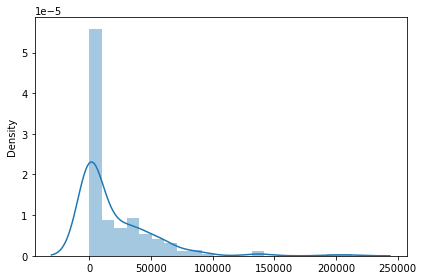

In [372]:
# Converting Pyspark Dataframe into Pandas dataframe
import seaborn as sns
df_sample=df_pyspark_n.select(['avg(Kms_Driven)','avg(Selling_Price)']).sample(False,0.5,42)
df_pandas2=df_sample.toPandas()
sns.distplot(df_pandas2)

In [373]:
# Converting Pyspark Dataframe into Pandas dataframe
import seaborn as sns
#df_sample=df_pyspark_n.select(['Kms_Driven','Selling_Price']).sample(False,0.5,42)
df_pandas=df_pyspark_n.toPandas()
#sns.distplot(df_pandas)

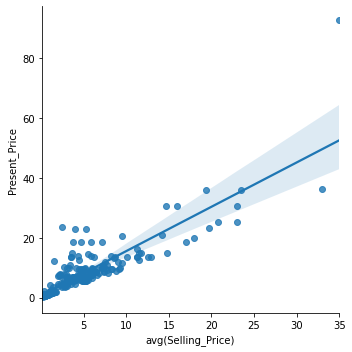

In [374]:
import seaborn as sns
sns.lmplot(x='avg(Selling_Price)', y='Present_Price',data=df_pandas)

In [375]:
df1=df_pandas.sort_values('avg(Kms_Driven)')
df1.head()

,Car_Name,Engine_Type,Registration_Years,Year,Present_Price,avg(Selling_Price),avg(Kms_Driven)
64,Bajaj Avenger 220,Petrol,6,2016,0.95,0.72,500.0
37,Activa 3g,Petrol,6,2016,0.54,0.45,500.0
38,Hero Passion Pro,Petrol,6,2016,0.55,0.45,1000.0
89,Bajaj Dominar 400,Petrol,5,2017,1.60,1.45,1200.0
27,Activa 4g,Petrol,5,2017,0.51,0.40,1300.0


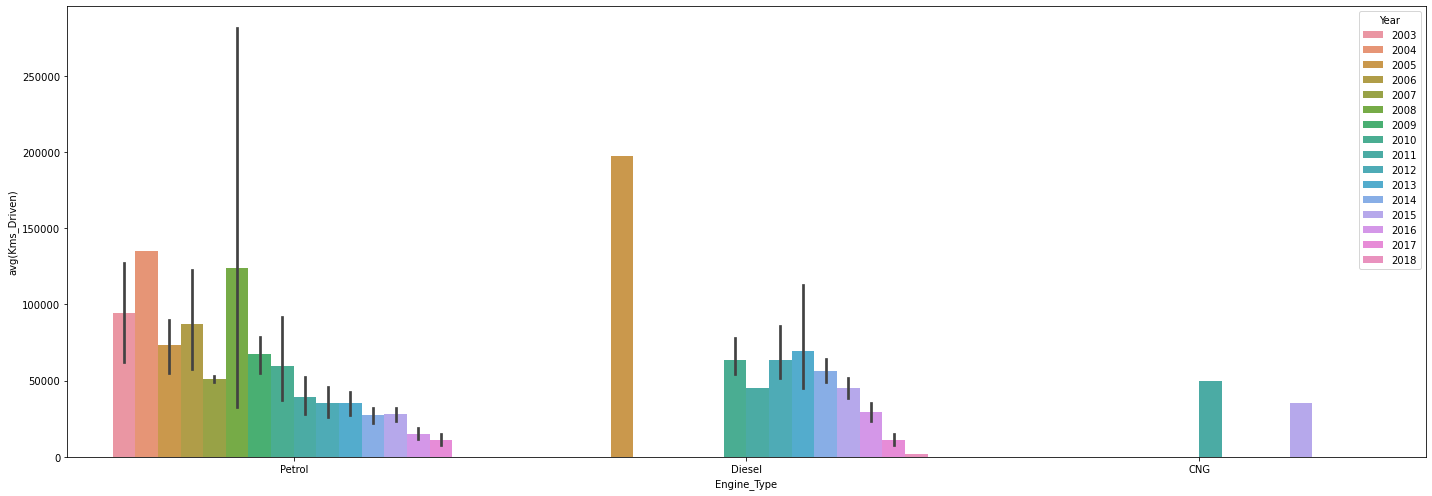

In [376]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20,7)
plt.rcParams["figure.autolayout"] = True
ax = sns.barplot(x="Engine_Type",y="avg(Kms_Driven)",hue="Year", data=df1)
plt.show()
#plt.xlabel("Vehicle Name", size=15)
#plt.ylabel("Drived", size=15)
#plt.title("Bar plot in Ascending Order with Matplotlib", size=18)
#plt.savefig("bar_plot_matplotlib_ascending_order_Python.png")

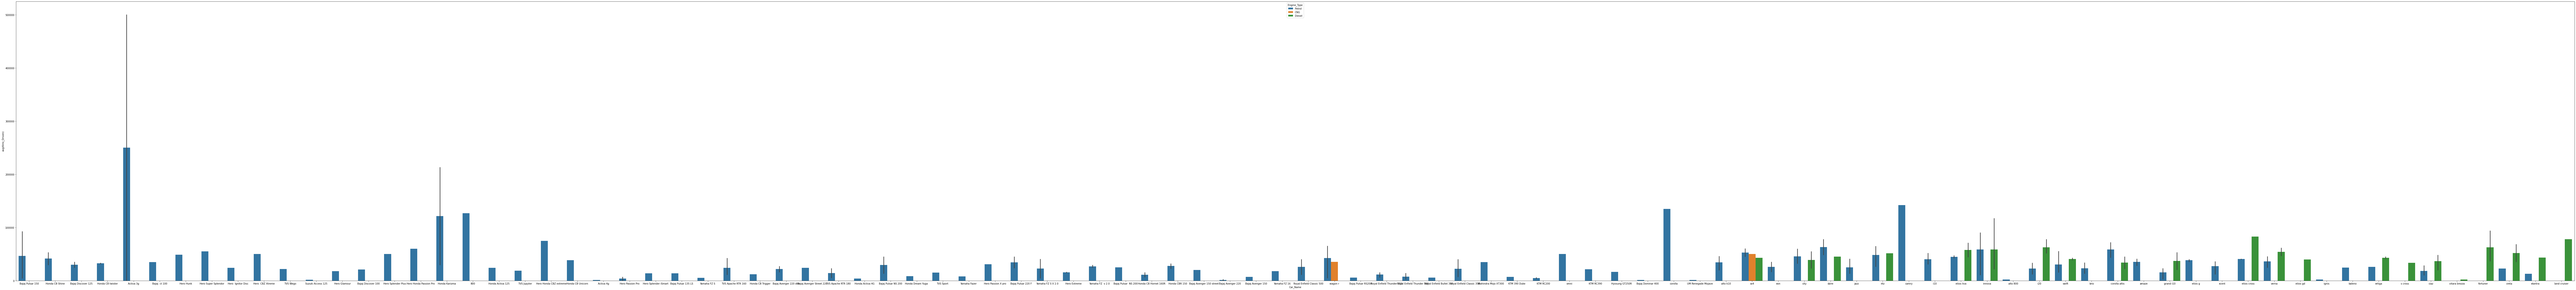

In [377]:
import pandas as pd
import matplotlib as plt
plt.rcParams['figure.figsize']=(150,17)
plt.rcParams["figure.autolayout"] = True
ax = sns.barplot(x="Car_Name",y="avg(Kms_Driven)",hue="Engine_Type", data=df_pandas)

In [378]:
df_pyspark.groupBy('Car_Name').count().show(50)

+--------------------+-----+
|            Car_Name|count|
+--------------------+-----+
|            TVS Wego|    1|
|           Hero Hunk|    1|
|                 800|    1|
|   Yamaha FZ S V 2.0|    3|
|       corolla altis|   16|
|             wagon r|    4|
|Royal Enfield Thu...|    3|
|  UM Renegade Mojave|    1|
|           Activa 4g|    1|
|      Hyosung GT250R|    1|
|   Bajaj Dominar 400|    1|
|   Bajaj Avenger 220|    3|
|  Bajaj Discover 125|    2|
|  Hero Splender Plus|    1|
|         etios cross|    3|
|        Yamaha FZ 16|    1|
|           KTM RC390|    1|
| Mahindra Mojo XT300|    1|
|               creta|    3|
|                 i10|    5|
|        land cruiser|    1|
|        Yamaha FZ S |    1|
|          TVS Sport |    1|
|Royal Enfield Bul...|    1|
|       Honda Karizma|    2|
|    Honda CB Unicorn|    1|
|              ertiga|    6|
|                brio|   10|
|       Honda CBR 150|    2|
|               amaze|    7|
|           Activa 3g|    2|
|             

In [379]:
from pyspark.sql.functions import col
df_swift=df_pyspark_n.filter(col("Car_Name").contains("swift"))
df_swift.show()

+--------+-----------+------------------+----+-------------+------------------+---------------+
|Car_Name|Engine_Type|Registration_Years|Year|Present_Price|avg(Selling_Price)|avg(Kms_Driven)|
+--------+-----------+------------------+----+-------------+------------------+---------------+
|   swift|     Petrol|                11|2011|         4.99|               3.0|        20000.0|
|   swift|     Petrol|                 9|2013|         5.87|              4.15|        55138.0|
|   swift|     Diesel|                 8|2014|         6.87|               4.6|        42450.0|
|   swift|     Diesel|                 8|2014|         7.49|              4.95|        39000.0|
|   swift|     Petrol|                 5|2017|         6.49|               6.0|        16200.0|
+--------+-----------+------------------+----+-------------+------------------+---------------+



## To find how many old cars in the list

## Directly apply Aggrigate functions  on a Column

In [380]:
df_pyspark_n.agg({'Registration_Years':'max'}).show()

+-----------------------+
|max(Registration_Years)|
+-----------------------+
|                     19|
+-----------------------+



In [382]:
from pyspark.sql.functions import desc
df_carage=df_pyspark_n.groupby('Car_Name','Engine_Type').max('Registration_Years').sort(desc("max(Registration_Years)"))
df_carage.show(10)

+-------------------+-----------+-----------------------+
|           Car_Name|Engine_Type|max(Registration_Years)|
+-------------------+-----------+-----------------------+
|                sx4|     Petrol|                     19|
|                800|     Petrol|                     19|
|            corolla|     Petrol|                     18|
|             innova|     Petrol|                     17|
|Hero Super Splendor|     Petrol|                     17|
|             innova|     Diesel|                     17|
|   Bajaj Pulsar 150|     Petrol|                     16|
|            wagon r|     Petrol|                     16|
|               city|     Petrol|                     16|
|              camry|     Petrol|                     16|
+-------------------+-----------+-----------------------+
only showing top 10 rows



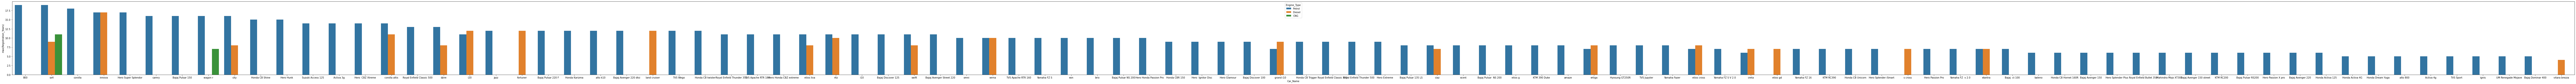

In [383]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd_carage=df_carage.toPandas()
plt.rcParams['figure.figsize']=(150,5)
plt.rcParams["figure.autolayout"] = True
ax2 = sns.barplot(x="Car_Name",y="max(Registration_Years)",hue='Engine_Type' ,data=pd_carage)
plt.show()
#plt.xlabel("Vehicle Name", size=15)
#plt.ylabel("Drived", size=15)
#plt.title("Bar plot in Ascending Order with Matplotlib", size=18)
#plt.savefig("bar_plot_matplotlib_ascending_order_Python.png")

## Which car is Driven more ? Make a Chart for that

In [384]:
from pyspark.sql.functions import desc
df_carkm=df_pyspark_n.groupby('Car_Name','Engine_Type').max('avg(Kms_Driven)').sort(desc("max(avg(KMS_Driven))"))
df_carkm.show(10)

+----------------+-----------+--------------------+
|        Car_Name|Engine_Type|max(avg(Kms_Driven))|
+----------------+-----------+--------------------+
|       Activa 3g|     Petrol|            500000.0|
|   Honda Karizma|     Petrol|            213000.0|
|          innova|     Diesel|            197176.0|
|           camry|     Petrol|            142000.0|
|         corolla|     Petrol|            135154.0|
|        fortuner|     Diesel|            135000.0|
|             800|     Petrol|            127000.0|
|Bajaj Pulsar 150|     Petrol|             92233.0|
|          innova|     Petrol|             90000.0|
|   corolla altis|     Petrol|             89000.0|
+----------------+-----------+--------------------+
only showing top 10 rows



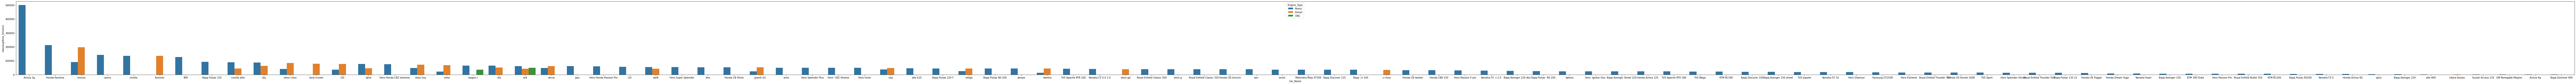

In [385]:
pd_carkm=df_carkm.toPandas()
plt.rcParams['figure.figsize']=(150,5)
plt.rcParams["figure.autolayout"] = True
ax2 = sns.barplot(x="Car_Name",y="max(avg(Kms_Driven))",hue='Engine_Type' ,data=pd_carkm)
plt.show()
#plt.xlabel("Vehicle Name", size=15)
#plt.ylabel("Drived", size=15)
#plt.title("Bar plot in Ascending Order with Matplotlib", size=18)
#plt.savefig("bar_plot_matplotlib_ascending_order_Python.png")

### 1. As we can see Activa is highest Driven Vehicle in the list
2. If we talk about Disel Vehicle then Innova is higher

In [387]:
df_pyspark_n.show(50)

+--------------------+-----------+------------------+----+-------------+-------------------+---------------+
|            Car_Name|Engine_Type|Registration_Years|Year|Present_Price| avg(Selling_Price)|avg(Kms_Driven)|
+--------------------+-----------+------------------+----+-------------+-------------------+---------------+
|    Bajaj Pulsar 150|     Petrol|                16|2006|         0.75|                0.1|        92233.0|
|      Honda CB Shine|     Petrol|                15|2007|         0.58|               0.12|        53000.0|
|  Bajaj Discover 125|     Petrol|                11|2011|         0.57|               0.15|        35000.0|
|    Honda CB twister|     Petrol|                12|2010|         0.51|               0.16|        33000.0|
|           Activa 3g|     Petrol|                14|2008|         0.52|               0.17|       500000.0|
|       Bajaj  ct 100|     Petrol|                 7|2015|         0.32|               0.18|        35000.0|
|  Bajaj Discover 1

In [420]:
#df_pyspark_n.write.option("header",True).csv("C:/Users/praw/Desktop/Python/DATASET/Zomato Dataset/CAR_PRICE_ANALYSIS")
#df_pyspark_n.write.format("csv").save("C/Users/praw/Desktop/Python/DATASET/Zomato Dataset/CAR_PRICE_ANALYSIS")
#df_pyspark_n.write.option("header",True).csv("C/Users/praw/Desktop/Python/DATASET/Zomato Dataset/CAR_PRICE_ANALYSIS")
#df_pyspark_n.write.csv('CARPRICE.csv')
#df_pyspark_n.toPandas().to_csv('CARPRICE.csv')
#df_pyspark_n.write.options("header"+-True, "delimiter"|",").csv("C/Users/praw/Desktop/Python/DATASET/Zomato Dataset")
#df_pyspark_n.write.option("header",True)
       #  .option("compression","gzip")
        # .csv("C/Users/praw/Desktop/Python/DATASET/Zomato Dataset")
df_pyspark_n.write.option(“header”, "true").save(“C/Users/praw/Desktop/Python/DATASET/Zomato Dataset/CARPRICE.csv”)


SyntaxError: invalid character in identifier (<ipython-input-420-27b1b4823d6e>, line 10)